In [1]:
#pip install yfinance

In [2]:
import yfinance as yf

In [3]:
from datetime import datetime
end= datetime.now()
start=datetime(end.year-20, end.month, end.day)

In [4]:
stock = "GOOG"
google_data= yf.download(stock,start,end)

C:\Users\91708\AppData\Local\Temp\ipykernel_6464\3741179011.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  google_data= yf.download(stock,start,end)
[*********************100%***********************]  1 of 1 completed


In [5]:
google_data.head()


Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2005-08-29,7.141868,7.158457,6.988112,6.988112,237005036
2005-08-30,7.112653,7.168114,7.078237,7.115623,192398464
2005-08-31,7.081208,7.143107,7.040602,7.136422,202114747
2005-09-01,7.087398,7.118347,7.056448,7.078980,110095123
2005-09-02,7.141868,7.179999,7.092102,7.093836,137894934


In [6]:
google_data.shape

(5033, 5)

In [7]:
google_data.describe()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
count,5033.000000,5033.000000,5033.000000,5033.000000,5.033000e+03
mean,54.124374,54.681930,53.548137,54.099406,9.462379e+07
std,51.232565,51.784221,50.666256,51.194886,1.184081e+08
min,6.374077,6.669459,6.123017,6.499608,1.584340e+05
25%,14.083186,14.199557,13.959636,14.079720,2.561000e+07
50%,31.332752,31.636447,31.004703,31.413275,4.413000e+07
75%,75.473877,76.152643,74.837052,75.332222,1.177116e+08
max,214.085007,214.210007,210.970001,211.279999,1.650833e+09


In [8]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5033 entries, 2005-08-29 to 2025-08-29
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, GOOG)   5033 non-null   float64
 1   (High, GOOG)    5033 non-null   float64
 2   (Low, GOOG)     5033 non-null   float64
 3   (Open, GOOG)    5033 non-null   float64
 4   (Volume, GOOG)  5033 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 235.9 KB


In [9]:
google_data.isna().sum()

Price   Ticker
Close   GOOG      0
High    GOOG      0
Low     GOOG      0
Open    GOOG      0
Volume  GOOG      0
dtype: int64

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

<Figure size 1500x500 with 0 Axes>

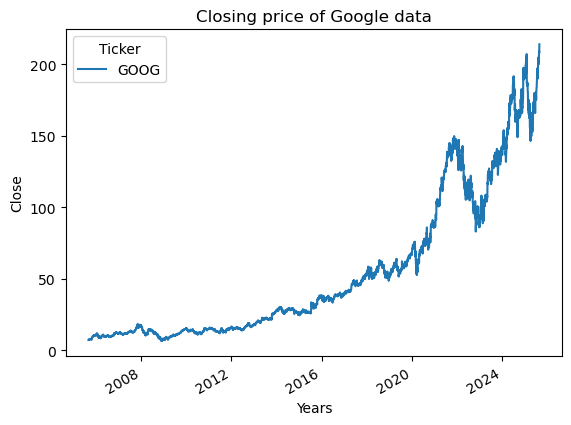

In [11]:
plt.figure(figsize=(15,5))
google_data['Close'].plot()
plt.xlabel("Years")
plt.ylabel("Close")
plt.title("Closing price of Google data")
plt.show()


In [12]:
def plot_graph(values, column_name):
    plt.figure(figsize=(15,5))
    values.plot()
    plt.xlabel("Years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google stock")
    plt.show()

In [13]:
# def plot_graph(figsize, values, column_name):
#     plt.figure()
#     values.plot(figsize=figzize)
#     plt.xlabel("years")
#     plt.ylabel(column_name)
#     plt.title(f"{column_name} of Google data")
    

In [14]:
google_data.columns

MultiIndex([( 'Close', 'GOOG'),
            (  'High', 'GOOG'),
            (   'Low', 'GOOG'),
            (  'Open', 'GOOG'),
            ('Volume', 'GOOG')],
           names=['Price', 'Ticker'])

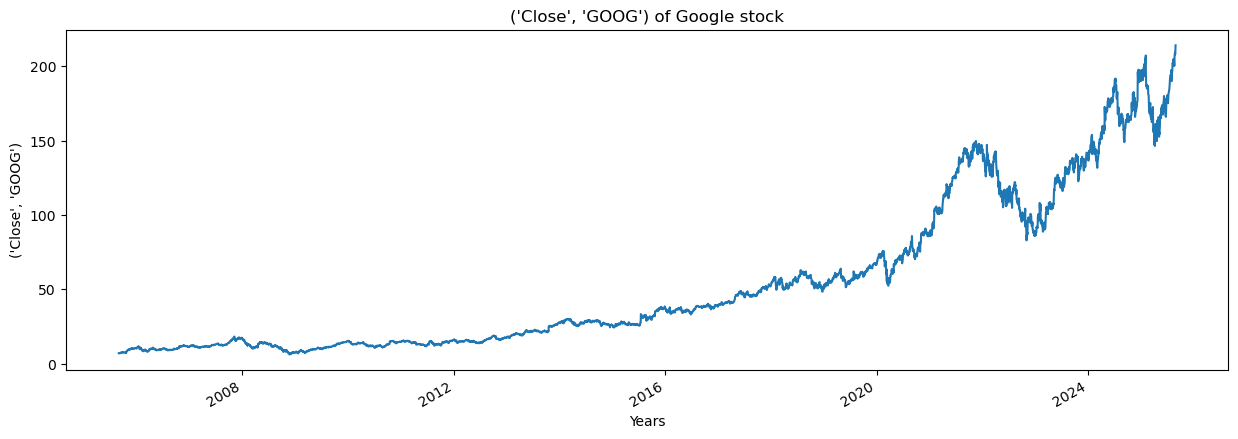

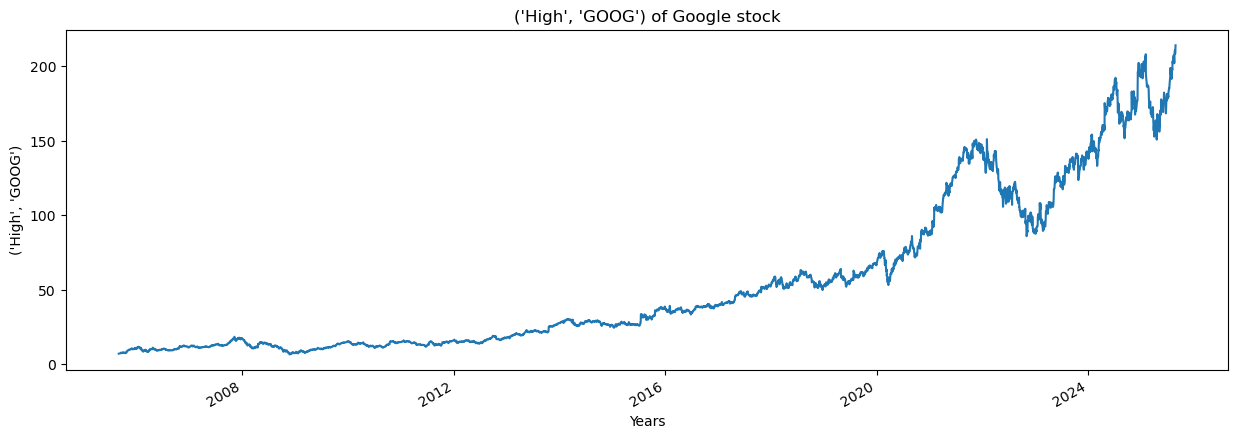

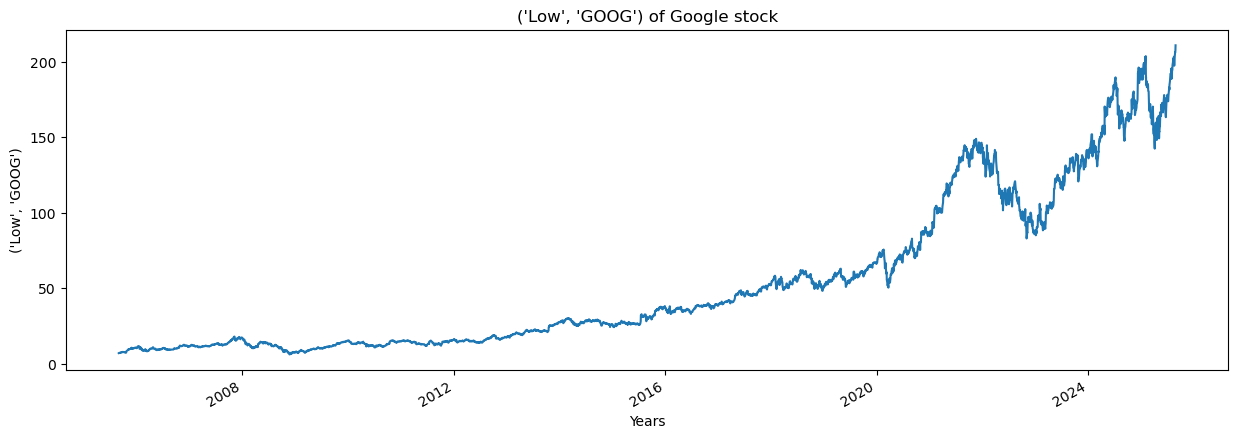

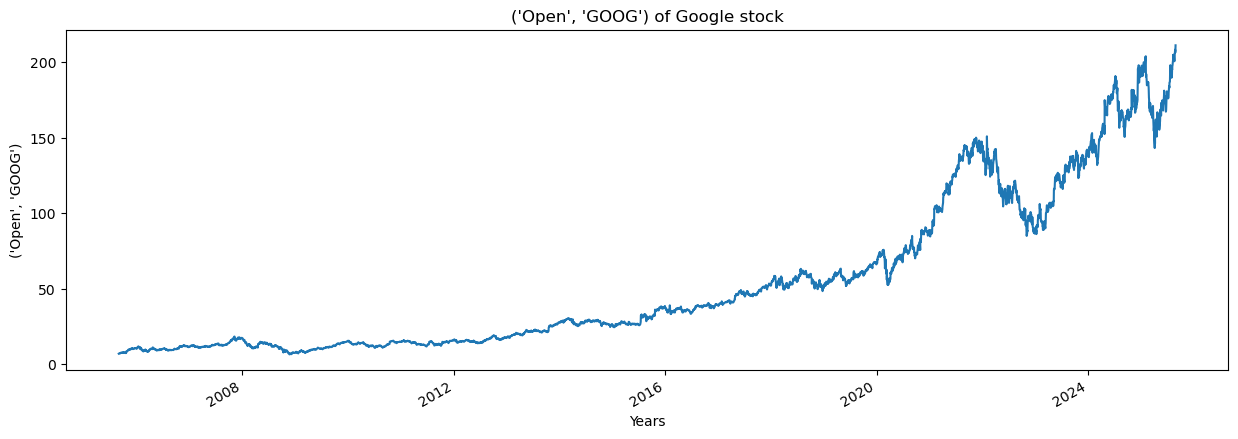

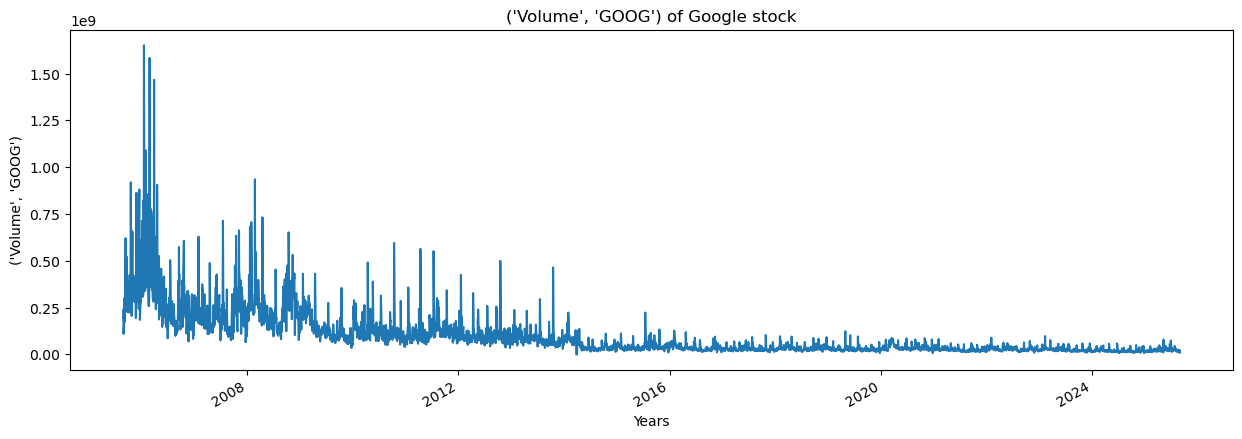

In [15]:
for column in google_data.columns:
    plot_graph(google_data[column], column)

In [16]:
# 10, 20, 30, 40, 50, 60, 70, 80, 90, 100

# MA for 5 days ==> null null null null  30

In [17]:
temp_data=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[:5])/5)

30.0


In [18]:
import pandas as pd
data =pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()


,0
0,10
1,20
2,30
3,40
4,50


In [19]:
data['MA']=data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [20]:
for i in range(2005,2025):
    print(i,list(google_data.index.year).count(i))




2005 87
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 252


In [21]:
google_data['MA_for_250_days']=google_data['Close'].rolling(250).mean()


In [22]:
google_data['MA_for_250_days'][0:250].tail()

Date
2006-08-18         NaN
2006-08-21         NaN
2006-08-22         NaN
2006-08-23         NaN
2006-08-24    9.430021
Name: MA_for_250_days, dtype: float64

In [23]:
# import matplotlib.pyplot as plt

# def plot_graph(figsize, values, column_name):
#     plt.figure(figsize=figsize)
#     values.plot()
#     plt.xlabel("Years")
#     plt.ylabel(column_name)
#     plt.title(f"{column_name} of Google data")
#     plt.show()
import matplotlib.pyplot as plt

def plot_graph(figsize, data, column_name):
    plt.figure(figsize=figsize)
    plt.plot(data, label=column_name)
    plt.xlabel("Years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")
    plt.legend()
    plt.show()


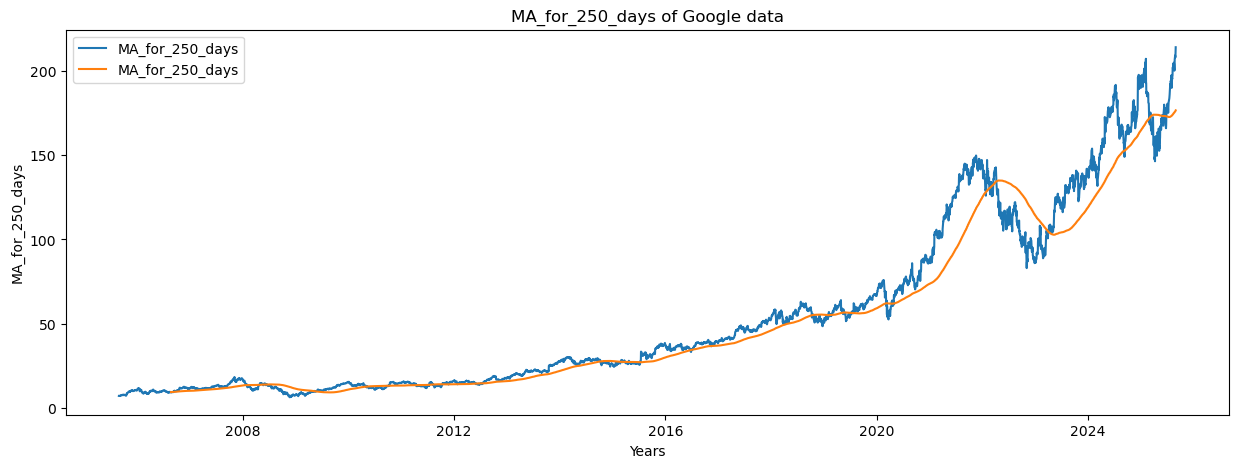

In [24]:

plot_graph((15,5), google_data[['Close', 'MA_for_250_days']], 'MA_for_250_days')


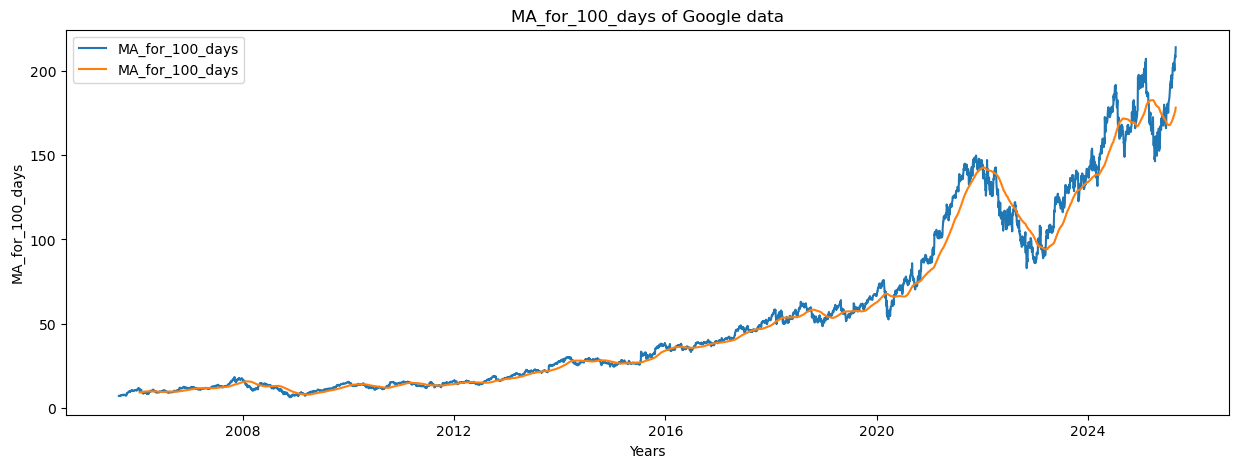

In [25]:
google_data['MA_for_100_days']=google_data['Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Close', 'MA_for_100_days']], 'MA_for_100_days')


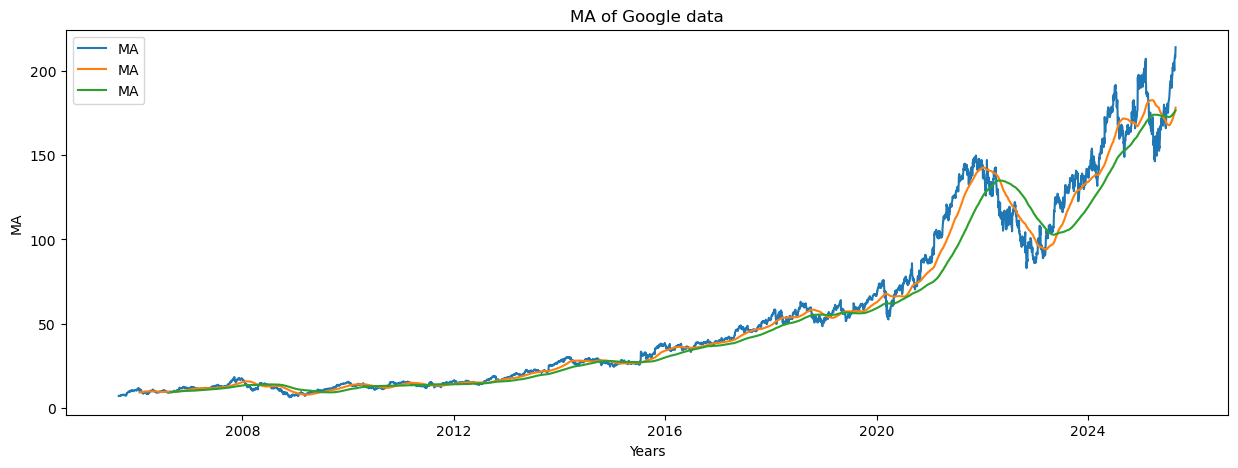

In [26]:
plot_graph((15,5), google_data[['Close', 'MA_for_100_days','MA_for_250_days' ]], 'MA')


In [27]:
google_data['percentage_change_cp'] = google_data['Close'].pct_change()

google_data[['Close', 'percentage_change_cp']].head()

Price,Close,percentage_change_cp
Ticker,GOOG,
Date,,
2005-08-29,7.141868,NaN
2005-08-30,7.112653,-0.004091
2005-08-31,7.081208,-0.004421
2005-09-01,7.087398,0.000874
2005-09-02,7.141868,0.007685


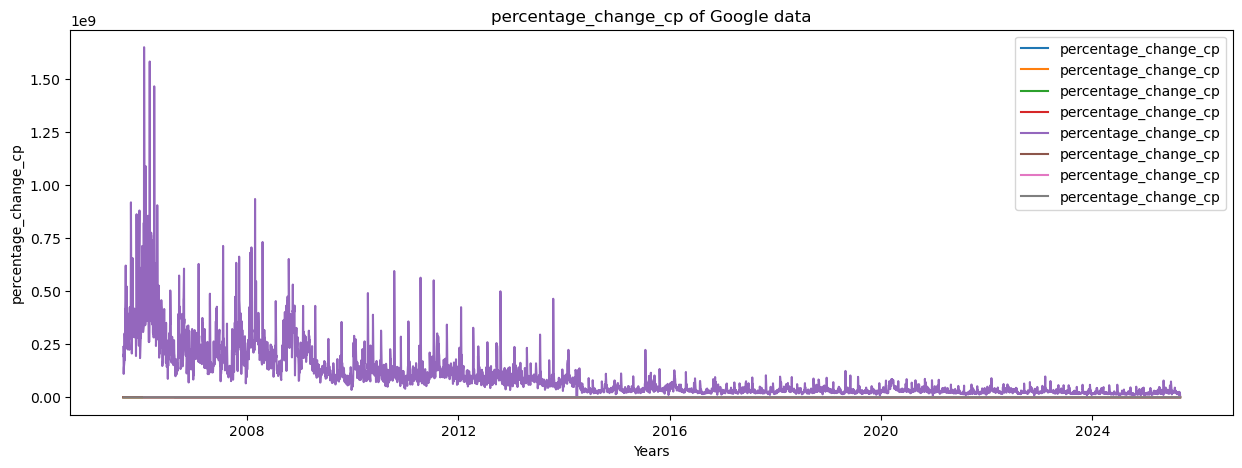

In [28]:
#plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change
plot_graph((15,5), google_data, 'percentage_change_cp')



In [29]:
Adj_close_price = google_data[['Close']]

In [30]:
max(Adj_close_price.values),min(Adj_close_price.values)

(array([214.08500671]), array([6.37407732]))

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler =  MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[0.00369644],
       [0.00355579],
       [0.0034044 ],
       ...,
       [0.9717155 ],
       [0.99174328],
       [1.        ]])

In [32]:
len(scaled_data)

5033

In [33]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100])
    y_data.append(scaled_data[i])

import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [34]:
x_data[0],y_data[0]

(array([0.00369644]), array([0.02027142]))

In [35]:
int(len(x_data)*0.7)

3453

In [36]:
5032-100-int(len(x_data)*0.7)

1479

In [37]:
splitting_len= int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[:splitting_len:]
y_test = y_data[:splitting_len:]

In [38]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3453, 1)
(3453, 1)
(3453, 1)
(3453, 1)


In [39]:
# from keras.models import Sequential
# from keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
print("Imports successful!")

Imports successful!


In [40]:
# import sys
# print(sys.executable)
import tensorflow as tf
print(tf.__version__)



2.19.0


In [43]:
model = Sequential()

model.add(LSTM(128, return_sequences=True, input_shape=(60, 1)))  # Example input_shape
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.summary()

C:\Users\91708\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
model.compile(optimizer='adam' , loss= 'mean_squared_error')

In [45]:
import numpy as np

# Example: let's say you're predicting the next number in a sequence
# Let's create dummy data of shape (100 samples, 60 timesteps, 1 feature)
x_train = np.random.rand(100, 60, 1)
y_train = np.random.rand(100, 1)


In [46]:
model.fit(x_train, y_train, batch_size=1, epochs=2)


Epoch 1/2
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 59ms/step - loss: 0.1087
Epoch 2/2
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 0.0995


In [47]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [48]:
predictions = model.predict(x_test)

108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step


In [49]:
x_train = np.random.rand(100, 60, 1)  # 100 samples, 60 timesteps, 1 feature
y_train = np.random.rand(100, 1)

# Create dummy x_test
x_test = np.random.rand(10, 60, 1)  # 10 new samples for prediction

# Define and compile the model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(60, 1)))
model.add(LSTM(64))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=2)

# Make predictions
predictions = model.predict(x_test)
print(predictions)

Epoch 1/2
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 51ms/step - loss: 0.1021
Epoch 2/2
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 0.0918
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.62713146]
 [0.61198086]
 [0.55790126]
 [0.64101714]
 [0.581952  ]
 [0.6261296 ]
 [0.6546606 ]
 [0.65193546]
 [0.6482424 ]
 [0.72518396]]


In [50]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Example y_train
y_train = np.random.rand(100, 1)

# Fit and transform y_train
scaler = MinMaxScaler()
y_train_scaled = scaler.fit_transform(y_train)

# After prediction
predictions = model.predict(x_test)

# Inverse transform predictions
inv_predictions = scaler.inverse_transform(predictions)
print(inv_predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
[[0.6373592 ]
 [0.62262505]
 [0.57003194]
 [0.6508632 ]
 [0.5934216 ]
 [0.6363849 ]
 [0.6641316 ]
 [0.6614814 ]
 [0.65788984]
 [0.73271644]]


In [51]:
import numpy as np

# Match y_test shape to predictions
y_test = np.random.rand(10, 1)  # if you have 10 test samples
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[0.14377305],
       [0.66360054],
       [0.53529643],
       [0.83534649],
       [0.11782608],
       [0.27563395],
       [0.28553336],
       [0.85977248],
       [0.05808092],
       [0.7831884 ]])

In [52]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [53]:
rmse

0.3437809470637401

In [54]:
plotting_data = pd.DataFrame(
    {
        'Original_test_data': inv_y_test.reshape(-1),
        'Predictions': inv_predictions.reshape(-1)
    },
    index = google_data.index[-len(inv_predictions):]
)


print(plotting_data.head())


            Original_test_data  Predictions
Date                                       
2025-08-18            0.143773     0.637359
2025-08-19            0.663601     0.622625
2025-08-20            0.535296     0.570032
2025-08-21            0.835346     0.650863
2025-08-22            0.117826     0.593422


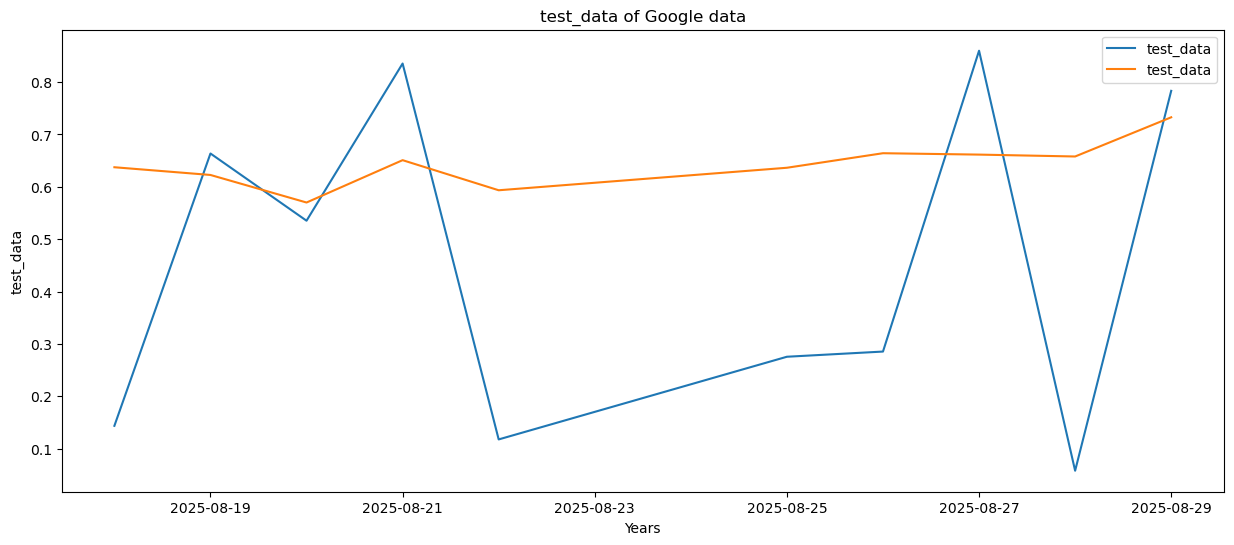

In [55]:
plot_graph((15,6), plotting_data, 'test_data')

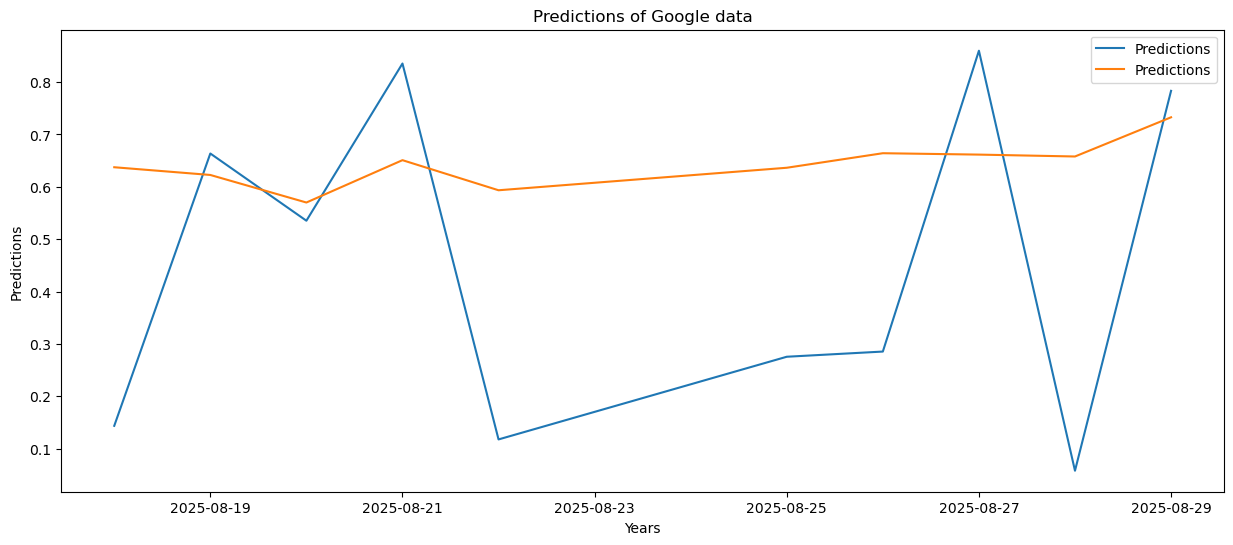

In [56]:
plot_graph((15,6), plotting_data, 'Predictions')

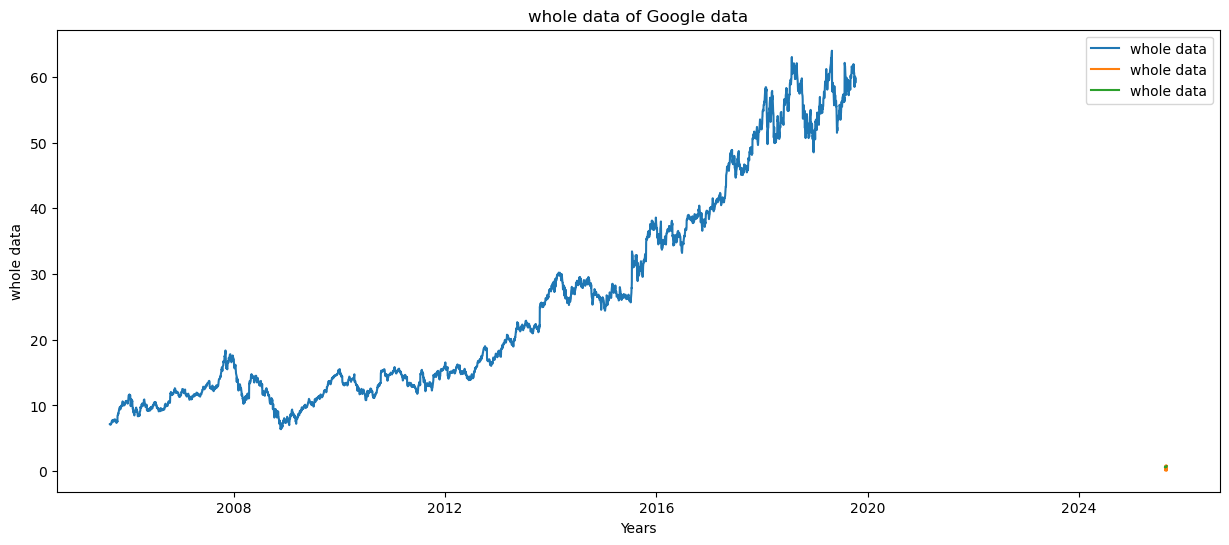

In [57]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100], plotting_data], axis =0), 'whole data')

In [58]:
 model.save("Lastest_stock_price_model.keras")